In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (22.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120893 files and direc

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import csv
from tqdm.auto import tqdm

In [4]:
col = pd.read_csv('col.csv', encoding='cp949')

In [5]:
col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934695 entries, 0 to 934694
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tot_chole  934695 non-null  int64 
 1   HDL_chole  934695 non-null  int64 
 2   LDL_chole  934695 non-null  int64 
 3   group      934695 non-null  object
dtypes: int64(3), object(1)
memory usage: 28.5+ MB


In [28]:
col.describe()

,tot_chole,HDL_chole,LDL_chole
count,934695.000000,934695.000000,934695.000000
mean,195.512273,56.712349,113.656223
std,34.798099,13.791773,31.048159
min,100.000000,30.000000,50.000000
25%,171.000000,46.000000,91.000000
50%,194.000000,55.000000,112.000000
75%,218.000000,65.000000,135.000000
max,492.000000,100.000000,200.000000


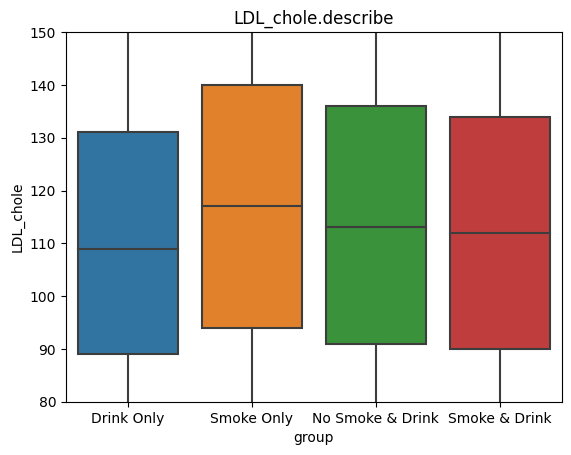

In [37]:
sns.boxplot(x='group',y='LDL_chole',data=col)

plt.ylim(80.0,150.0)

plt.title("LDL_chole.describe")
plt.ylabel("LDL_chole")
plt.xlabel("group")
plt.show()

In [ ]:
# https://leebaro.tistory.com/entry/%EB%B0%95%EC%8A%A4-%ED%94%8C%EB%A1%AFbox-plot-%EC%84%A4%EB%AA%85

<Axes: xlabel='HDL_chole', ylabel='LDL_chole'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


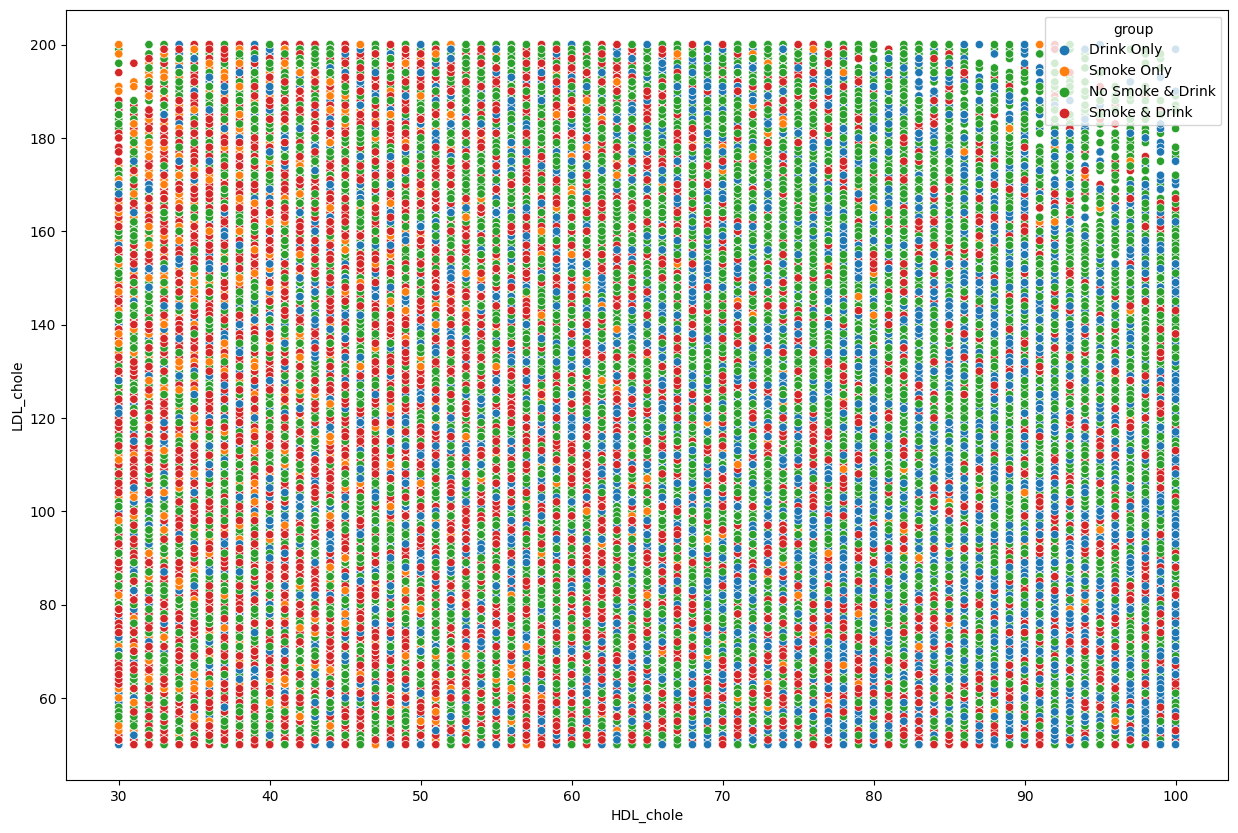

In [ ]:
plt.figure(figsize=(15, 10))

sns.scatterplot(data=col, x='HDL_chole', y='LDL_chole', hue='group')

199    10844
184    10643
189    10635
190    10586
188    10570
       ...  
405        1
353        1
420        1
386        1
422        1
Name: tot_chole, Length: 291, dtype: int64


<Axes: xlabel='tot_chole', ylabel='count'>

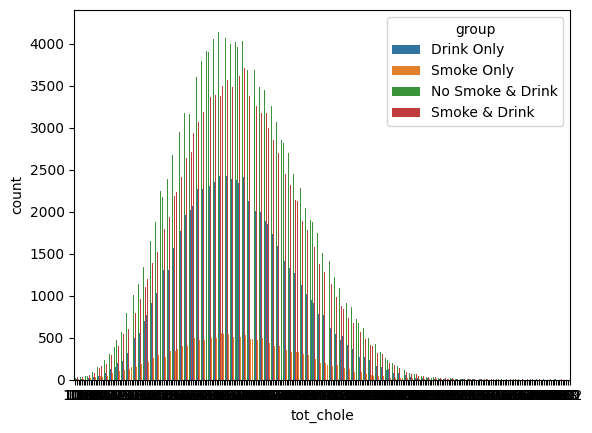

In [ ]:
print(col['tot_chole'].value_counts())
sns.countplot(data=col, x='tot_chole', hue='group')

In [6]:
col

,tot_chole,HDL_chole,LDL_chole,group
0,193,48,126,Drink Only
1,228,55,148,Smoke Only
2,136,41,74,No Smoke & Drink
3,201,76,104,No Smoke & Drink
4,199,61,117,No Smoke & Drink
...,...,...,...,...
934690,198,46,125,No Smoke & Drink
934691,133,40,84,No Smoke & Drink
934692,205,96,77,Smoke & Drink
934693,122,38,73,No Smoke & Drink


In [7]:
df = col.groupby('group').mean()
df

,tot_chole,HDL_chole,LDL_chole
group,,,
Drink Only,194.502050,60.899825,111.602037
No Smoke & Drink,195.193212,57.776327,114.609550
Smoke & Drink,196.587780,53.925893,113.231939
Smoke Only,195.196060,49.225838,117.692035


In [8]:
dff = df[['HDL_chole']]
dff

,HDL_chole
group,
Drink Only,60.899825
No Smoke & Drink,57.776327
Smoke & Drink,53.925893
Smoke Only,49.225838


In [ ]:
dfff = dff.unstack()
dfff

           group           
tot_chole  Drink Only          39378107
           No Smoke & Drink    72089733
           Smoke & Drink       61745666
           Smoke Only           9530838
dtype: int64

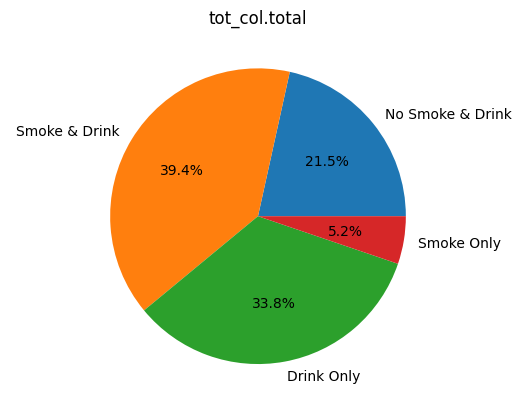

In [ ]:
plt.axis('equal')
plt.title('tot_col.total')
labels = ['No Smoke & Drink','Smoke & Drink','Drink Only','Smoke Only'] #tot
plt.pie(dfff['tot_chole'],labels=labels,autopct = '%1.1f%%')
plt.show()

In [ ]:
# https://mirandaherr.tistory.com/38

In [ ]:
# df.unstack().sort_values().plot(kind = 'barh')
# .sort_values() -> 내림차순
# https://go-for-data.tistory.com/entry/%EC%8B%9C%EA%B0%81%ED%99%94-matplotlib-plot-plt

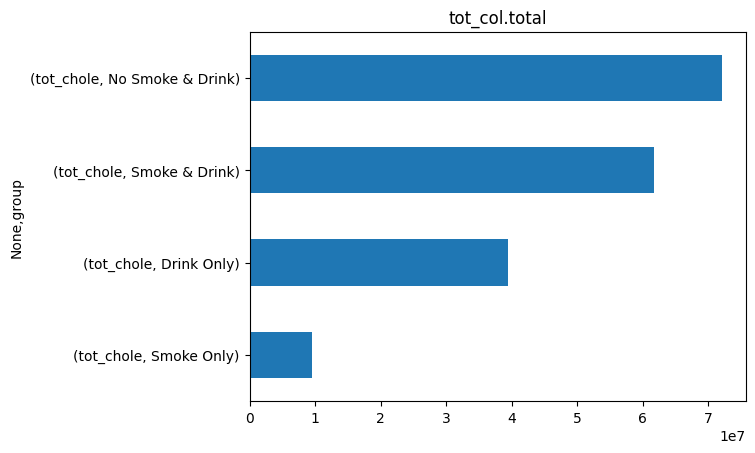

In [ ]:
dff.unstack().sort_values().plot(kind = 'barh')
plt.title('tot_col.total')

plt.show()

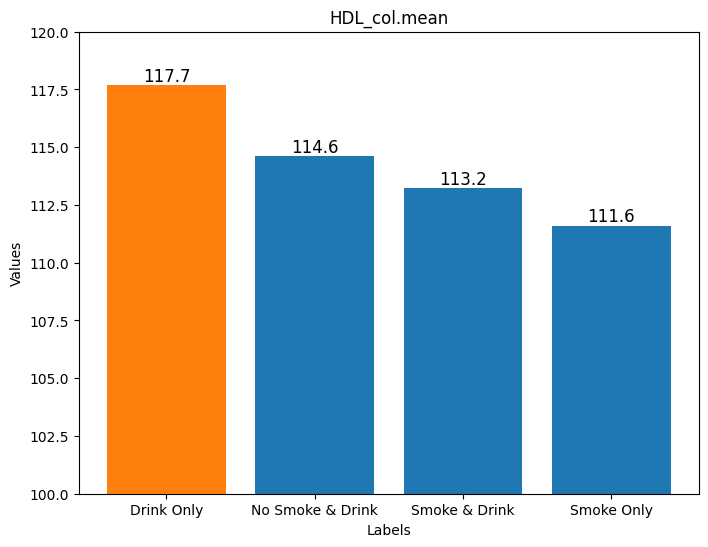

In [21]:
# 간단한 막대 그래프 그리기 코드

# 데이터 설정
# values = [196.587780,195.196060,195.193212,194.502050] #tot
values = [117.692035, 114.609550, 113.231939, 111.602037] #HDL
# values = [60.899825, 57.776327, 53.925893, 49.225838] #LDL

# labels = ['Smoke & Drink','Smoke Only','No Smoke & Drink','Drink Only'] #tot
labels = ['Drink Only','No Smoke & Drink','Smoke & Drink','Smoke Only'] #HDL
# labels = ['Smoke Only','No Smoke & Drink','Smoke & Drink','Drink Only'] #LDL

# bar plot 생성
plt.figure(figsize=(8, 6))
bar = plt.bar(labels, values, color=['#ff7f0e', '#1f77b4', '#1f77b4', '#1f77b4'])
plt.xlabel('Labels')
plt.ylabel('Values')
# plt.xticks(color='#ff7f0e') # 글자 색 바꾸기
plt.title('HDL_col.mean')
plt.ylim(100,120) # 그래프 크기 자르기

# 범주 넣기
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

plt.show()

In [ ]:
# https://jimmy-ai.tistory.com/24

In [ ]:
col

In [ ]:
coll = col[["tot_chole","group"]]
coll

In [ ]:
coll['group'].value_counts()

NameError: ignored

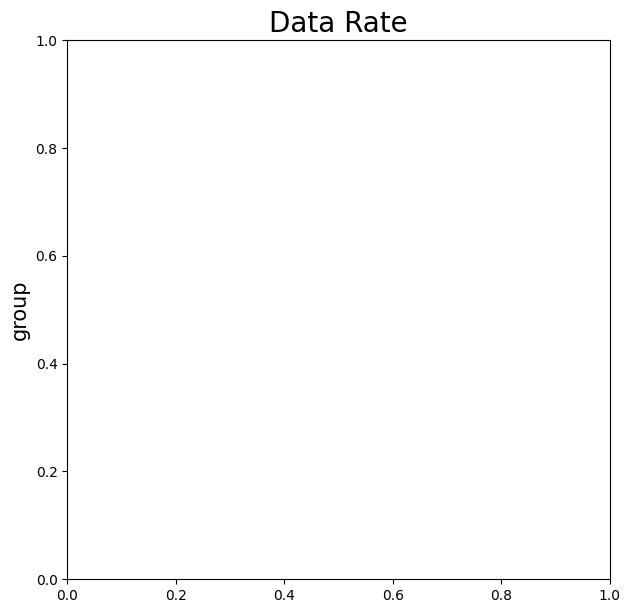

In [ ]:
plt.figure(figsize=(7,7))

plt.title('Data Rate' , fontsize=20)

plt.ylabel('group' , fontsize=15)

coll['group'].value_counts().plot.pie(autopct = '%.2f%%' ,
                                         colors = ['skyblue', 'lavender','orange','hotpink'] ,
                                         textprops = {'fontsize' : 12 ,
                                                      'weight' : 'bold'})

plt.show()

In [ ]:
# https://eletronicprogrammer.tistory.com/54?category=904280

In [ ]:
# col.groupby(col['group'])

In [ ]:
coll['group'].unique()

In [ ]:
coll.set_index("group",inplace=True)
coll
# 그룹 인덱스 생성

In [ ]:
do = coll.loc["Drink Only"]
do
# 그룹에서 원하는 인덱스만 생성

In [ ]:
do.reset_index(drop = False, inplace = True)
do
# 인덱스 초기화

In [ ]:
sns.set_style('whitegrid')
sns.scatterplot(data=do, x='group', y='tot_chole')

In [ ]:
so = coll.loc["Smoke Only"]
so

In [ ]:
so.reset_index(drop = False, inplace = True)
so

In [ ]:
nsd = coll.loc["No Smoke & Drink"]
nsd

In [ ]:
nsd.reset_index(drop = False, inplace = True)
nsd

In [ ]:
sd = coll.loc["Smoke & Drink"]
sd

In [ ]:
sd.reset_index(drop = False, inplace = True)
sd

In [ ]:
# https://gooopy.tistory.com/92

In [ ]:
# # seaborn scatter plot

# plt.figure(figsize=(15, 10))

# sns.scatterplot(data=col, x='HDL_chole', y='LDL_chole', hue='group')

In [ ]:
# # 2-2. Multiple histograms at separate windows

# f, col = plt.subplots(2, 2, figsize=(8, 6), sharex=True)

# sns.distplot(col["sepal_length"], color="blue", ax=col[0, 0])

# sns.distplot(col["sepal_width"], color="red", ax=col[0, 1])

# sns.distplot(col["petal_length"], color="yellow", ax=col[1, 0])

# sns.distplot(col["petal_width"], color="green", ax=col[1, 1])

# plt.show()